### Sparkling Wine Sales Data Analysis.

In [1]:
import numpy                           as np
import pandas                          as pd
import itertools                       as itools

In [2]:
from   statsmodels.tsa.seasonal        import seasonal_decompose
import statsmodels.api                 as sm_api

C:\Users\FatBoy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\FatBoy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
from   sklearn.linear_model            import LinearRegression
from   statsmodels.tsa.api             import ExponentialSmoothing          
from   statsmodels.tsa.api             import SimpleExpSmoothing            
from   statsmodels.tsa.api             import Holt       
from   statsmodels.tsa.arima.model     import ARIMA

In [4]:
from   statsmodels.tsa.stattools       import adfuller
from   statsmodels.graphics.tsaplots   import plot_pacf
from   statsmodels.graphics.tsaplots   import plot_acf

In [5]:
from   sklearn.metrics                 import mean_squared_error as rmse
import statsmodels.tools.eval_measures as     evaluate

In [6]:
import seaborn                         as     sns
from   pylab                           import rcParams
import matplotlib.pyplot               as     plt
import dataframe_image                 as     dfi
%matplotlib inline 

In [7]:
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
canvas = 'figure.figsize'

# static method for mape
def mape(y_true, y_pred):
    value = np.mean((np.abs(y_true-y_pred))/(y_true))*100
    return value

In [9]:
# importing the historical sales data

df = pd.read_csv('sparkling.csv')   
df.columns = ['year-month','sales']

In [10]:
# generating datefield

date = pd.date_range(start='1980/1/1', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [11]:
# attaching the datefield and setting the index

df['date'] = date
df.drop('year-month', axis=1, inplace=True)
df.set_index('date', inplace=True)

In [12]:
print(' First 5 Records','\n')
print(df.head(5))

 First 5 Records 

            sales
date             
1980-01-31   1686
1980-02-29   1591
1980-03-31   2304
1980-04-30   1712
1980-05-31   1471


In [13]:
print(' Last 5 Records','\n')
print(df.tail(5))

 Last 5 Records 

            sales
date             
1995-03-31   1897
1995-04-30   1862
1995-05-31   1670
1995-06-30   1688
1995-07-31   2031


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [15]:
print(df.describe())

             sales
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


In [16]:
# missing values check in the time series data

missing_values = df.isnull().sum()[0]
print('Missing values in sales history: {}'.format(missing_values))

Missing values in sales history: 0


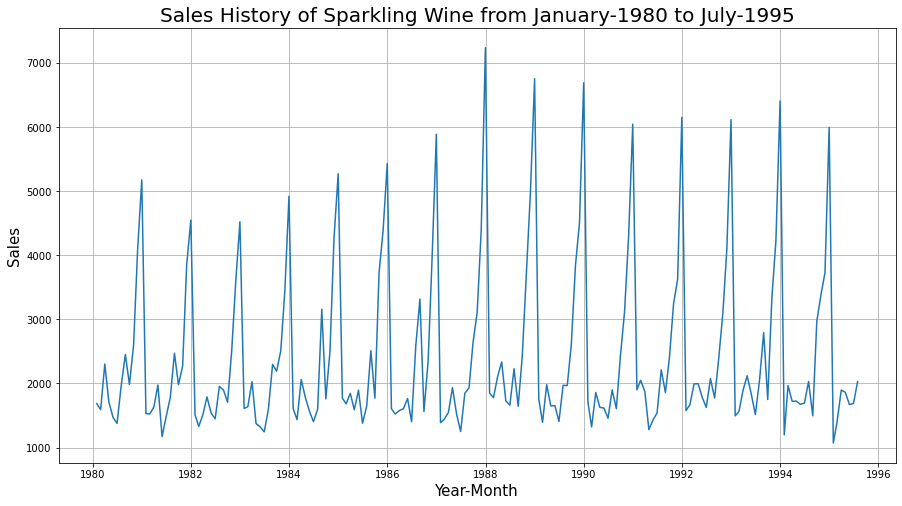

In [17]:
# original time series data (sparkling wine sales)

plt.figure(figsize=(15,8))
sns.lineplot(x=df.index, y=df['sales'])
plt.title('Sales History of Sparkling Wine from January-1980 to July-1995', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()

Observations:

- We have 15 years and 7 months of historical sales of sparkling wine. From the original time series plot, we can observe that there is a varying seasonality in the sales history but not a significant trend throughout 187 months.

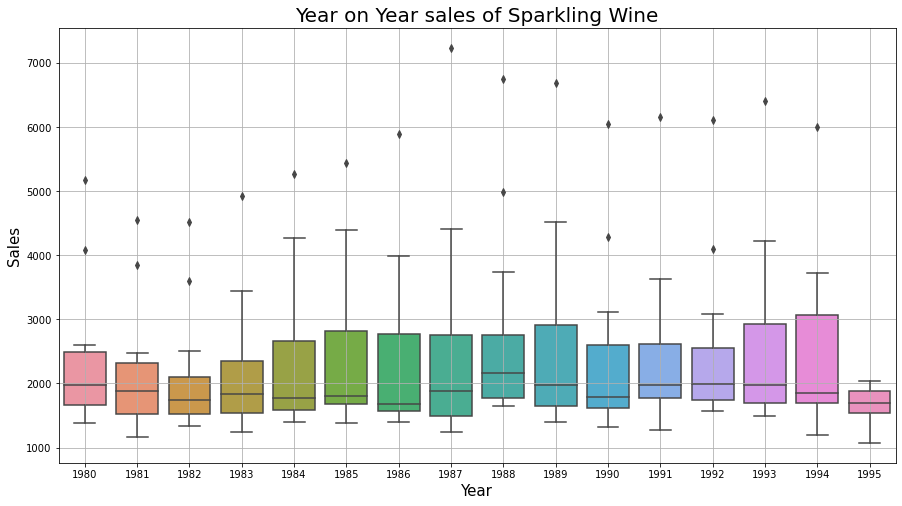

In [18]:
# year on year sales analysis

plt.figure(figsize=(15,8))
sns.boxplot(x=df.index.year, y=df['sales'])
plt.title('Year on Year sales of Sparkling Wine', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()

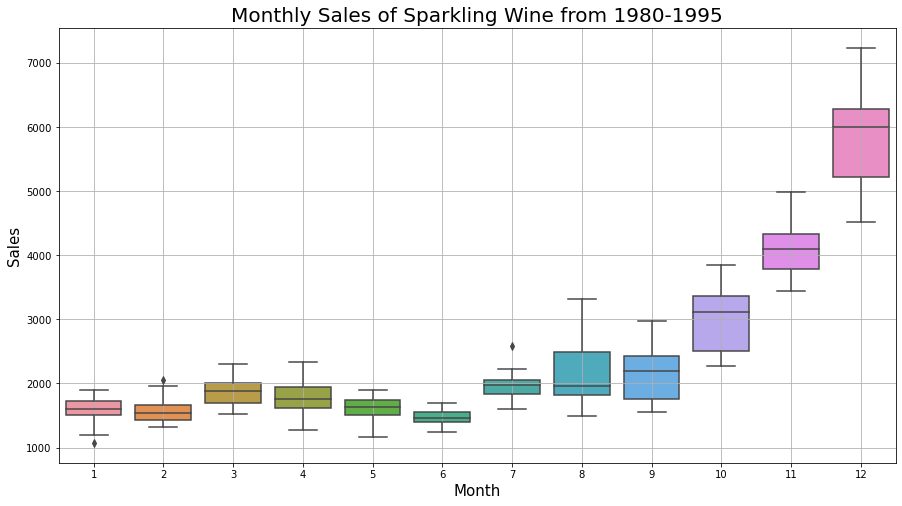

In [19]:
# monthly sales analysis for all the years combines

plt.figure(figsize=(15,8))
sns.boxplot(x=df.index.month, y=df['sales'])
plt.title('Monthly Sales of Sparkling Wine from 1980-1995', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()

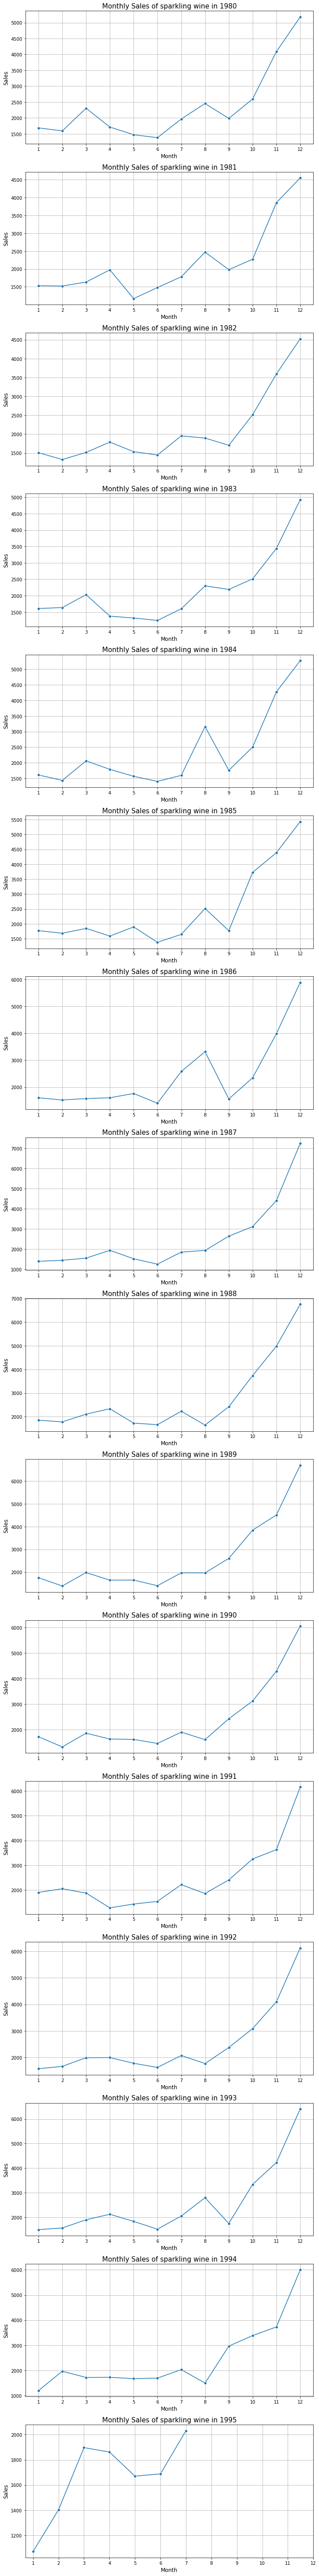

In [20]:
# month-wise lineplot of beer production (for individual years)

years = df.index.year.unique()

plt.figure(figsize=(10,80))
for i in range(0,len(years)):
    data = df[df.index.year == years[i]]
    plt.subplot(16,1,i+1)
    sns.lineplot(x=data.index.month, y=data['sales'], marker='o')
    plt.title('Monthly Sales of sparkling wine in {}'.format(years[i]), fontsize=15)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.xticks(np.arange(1,13,1))
    plt.grid()
    plt.tight_layout()

In [21]:
# pivot table (year-month)
table = pd.pivot_table(df, index=df.index.year, columns=df.index.month, values='sales').T
table['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
table.set_index('month', inplace=True)

In [22]:
# month with minimum and maximum sales over the years
clr_table = table.style.format('{:.0f}')\
             .highlight_null(null_color='#ced4da')\
             .highlight_max(color='#80ed99')\
             .highlight_min(color='#ff595e')
clr_table

date,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
month,,,,,,,,,,,,,,,,
Jan,1686,1530,1510,1609,1609,1771,1606,1389,1853,1757,1720,1902,1577,1494,1197,1070
Feb,1591,1523,1329,1638,1435,1682,1523,1442,1779,1394,1321,2049,1667,1564,1968,1402
Mar,2304,1633,1518,2030,2061,1846,1577,1548,2108,1982,1859,1874,1993,1898,1720,1897
Apr,1712,1976,1790,1375,1789,1589,1605,1935,2336,1650,1628,1279,1997,2121,1725,1862
May,1471,1170,1537,1320,1567,1896,1765,1518,1728,1654,1615,1432,1783,1831,1674,1670
Jun,1377,1480,1449,1245,1404,1379,1403,1250,1661,1406,1457,1540,1625,1515,1693,1688
Jul,1966,1781,1954,1600,1597,1645,2584,1847,2230,1971,1899,2214,2076,2048,2031,2031
Aug,2453,2472,1897,2298,3159,2512,3318,1930,1645,1968,1605,1857,1773,2795,1495,nan
Sep,1984,1981,1706,2191,1759,1771,1562,2638,2421,2608,2424,2408,2377,1749,2968,nan


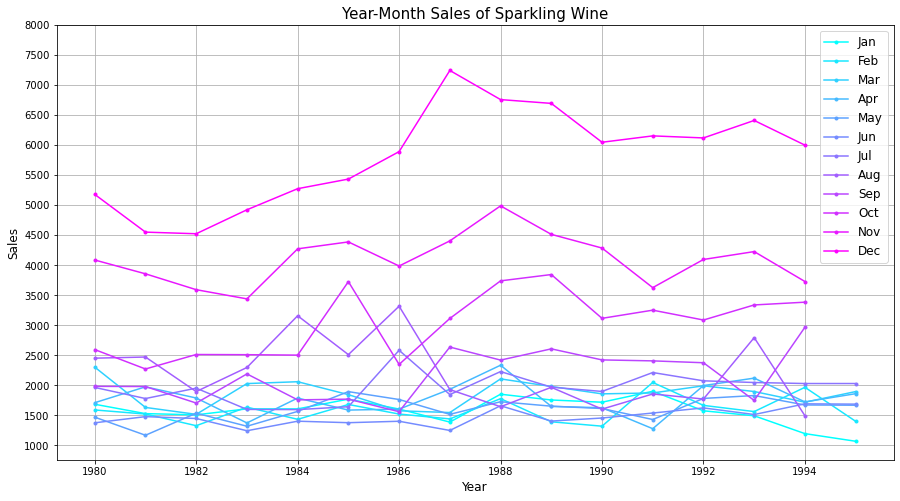

In [23]:
# visualizing the trends

data = table.T
canvas  = 'figure.figsize'
y_range = np.arange(1000,8001,500)

months  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

rcParams[canvas] = (15,8)
data.plot(cmap='cool', marker='.')
plt.title('Year-Month Sales of Sparkling Wine', fontsize=15)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.yticks(y_range)
plt.grid()
plt.legend(labels=months,fontsize=12)
plt.show()

Observations:

- From 1980 to 1994, the maximum sales were recorded in the fourth quarter of every year especially december.
- From the year wise analysis we can observe that the minimum sales were recorded mostly in the months of June, May and February.
- The highest sales of sparkling wine was recorded in 1987 which is 7242 and lowest sales was recorded in 1995 which is 1070.

--------------

### Decomposition

In [24]:
# additive decomposition
comps = seasonal_decompose(df, model='additive')

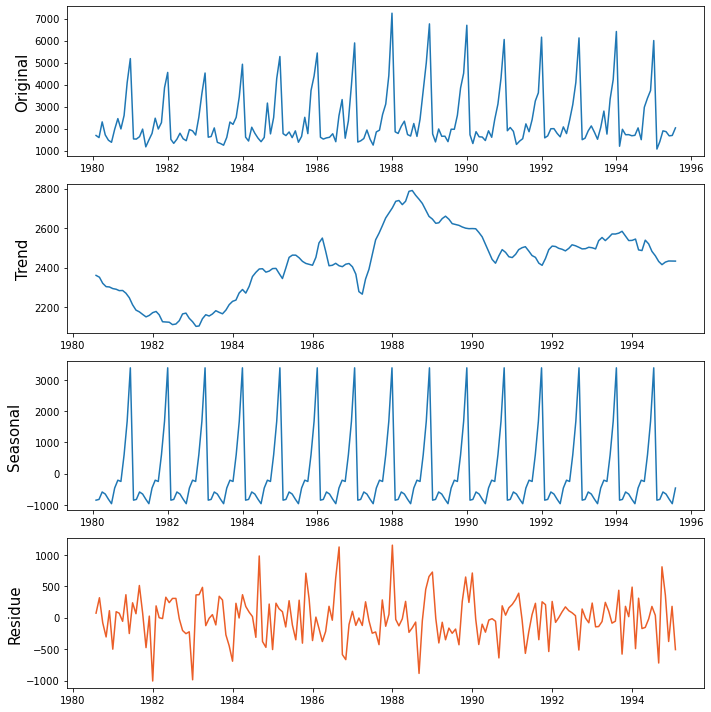

In [25]:
# canvas setting
rcParams['figure.figsize'] = (10,10)

# original time series data
plt.subplot(4,1,1)
plt.ylabel('Original', fontsize=15)
plt.plot(comps.observed)

# trend component
plt.subplot(4,1,2)
plt.ylabel('Trend', fontsize=15)
plt.plot(comps.trend)

# seasonal component
plt.subplot(4,1,3)
plt.ylabel('Seasonal', fontsize=15)
plt.plot(comps.seasonal)

# residual component
plt.subplot(4,1,4)
plt.ylabel('Residue', fontsize=15)
plt.plot(comps.resid, color='#eb5e28')
plt.tight_layout()

In [26]:
# multiplicative decomposition
comps = seasonal_decompose(df, model='multiplicative')

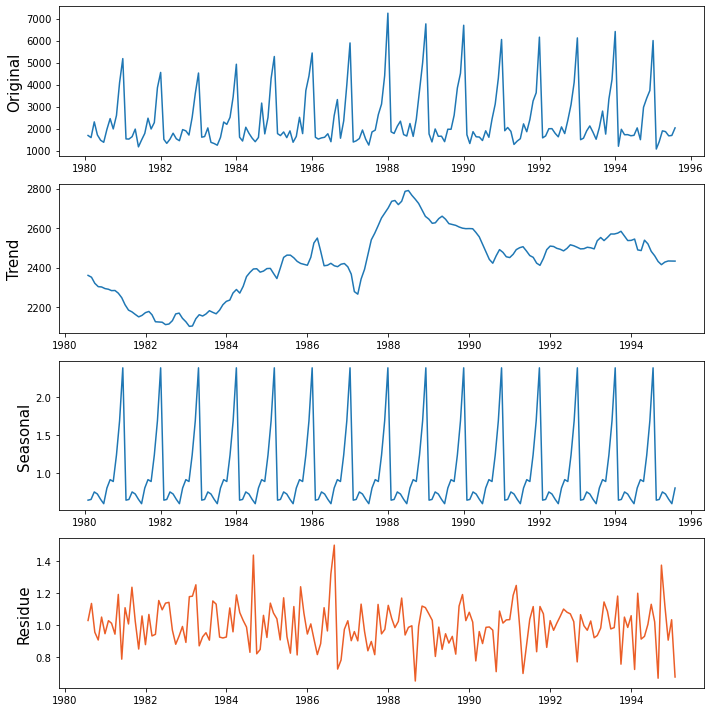

In [27]:
# canvas setting
rcParams['figure.figsize'] = (10,10)

# original time series data
plt.subplot(4,1,1)
plt.ylabel('Original', fontsize=15)
plt.plot(comps.observed)

# trend component
plt.subplot(4,1,2)
plt.ylabel('Trend', fontsize=15)
plt.plot(comps.trend)

# seasonal component
plt.subplot(4,1,3)
plt.ylabel('Seasonal', fontsize=15)
plt.plot(comps.seasonal)

# residual component
plt.subplot(4,1,4)
plt.ylabel('Residue', fontsize=15)
plt.plot(comps.resid, color='#eb5e28')
plt.tight_layout()

Observations:

- From the decomposition plots we can observe that the irregular component does not follow any patterns and completely random for both additive and multiplicative methods.
- There is no linearly increasing or decreasing trend in the overall sales history but it is following a sine wave like pattern.

-------

### Modelling Prerequisites

In [28]:
tr_data = df[df.index.year<1991]
ts_data = df[df.index.year>=1991]

In [29]:
print(tr_data.head())

            sales
date             
1980-01-31   1686
1980-02-29   1591
1980-03-31   2304
1980-04-30   1712
1980-05-31   1471


In [30]:
print(tr_data.tail())

            sales
date             
1990-08-31   1605
1990-09-30   2424
1990-10-31   3116
1990-11-30   4286
1990-12-31   6047


In [31]:
print(ts_data.head())

            sales
date             
1991-01-31   1902
1991-02-28   2049
1991-03-31   1874
1991-04-30   1279
1991-05-31   1432


In [32]:
print(ts_data.tail())

            sales
date             
1995-03-31   1897
1995-04-30   1862
1995-05-31   1670
1995-06-30   1688
1995-07-31   2031


In [33]:
print('Train Data Size: {}'.format(len(tr_data)))
print('Test Data Size : {}'.format(len(ts_data)))

Train Data Size: 132
Test Data Size : 55


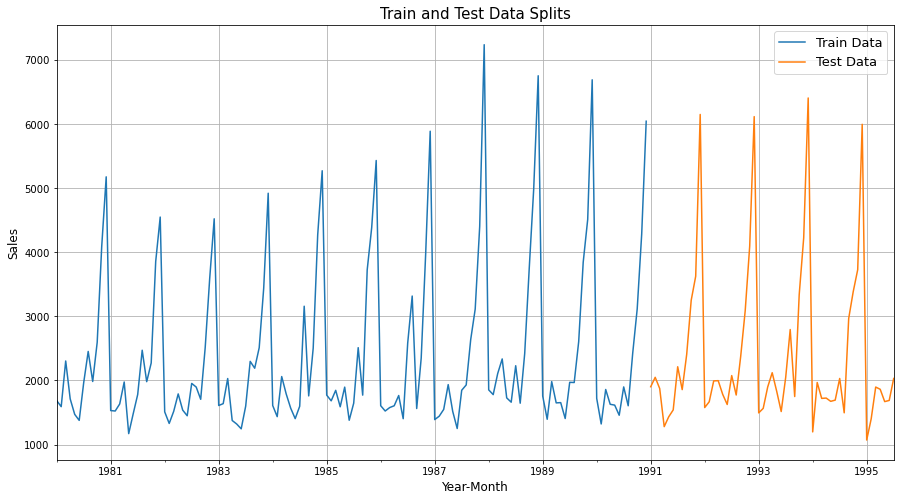

In [34]:
# train and test data plots
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
plt.title('Train and Test Data Splits', fontsize=15)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.legend(['Train Data','Test Data'], fontsize=13)
plt.show()

### Linear Regression Model

In [35]:
# creating a new independent variable 'instance'

# for train data
train_instance = [i+1 for i in range(len(tr_data))]
tr_data['instance'] = train_instance

# for test_data
test_instance = [i+133 for i in range(len(ts_data))]
ts_data['instance'] = test_instance

In [36]:
# dependent and independent variables

x = tr_data[['instance']]
y = tr_data['sales']

model = LinearRegression().fit(x,y)

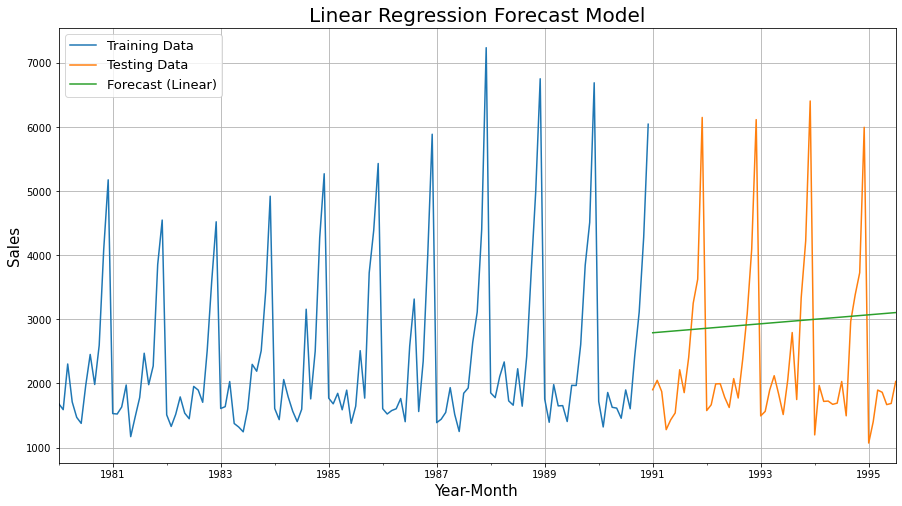

In [37]:
# making predictions
value = model.predict(ts_data[['instance']])
ts_data['fc_lm'] = value

# plotting the prediction results
rcParams['figure.figsize'] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_lm'].plot()
plt.title('Linear Regression Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (Linear)'],
           fontsize=13, loc='upper left')
plt.show()

In [38]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_lm']

rmse_scr = round(rmse(ts_data['sales'], y_pred, squared=False),2)
mape_scr = round(mape(ts_data['sales'], y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 1389.14
MAPE: 59.35


### Naive Forecast Model

In [39]:
value = tr_data['sales'][-1]
print('Forecast Value: {}'.format(value))

Forecast Value: 6047


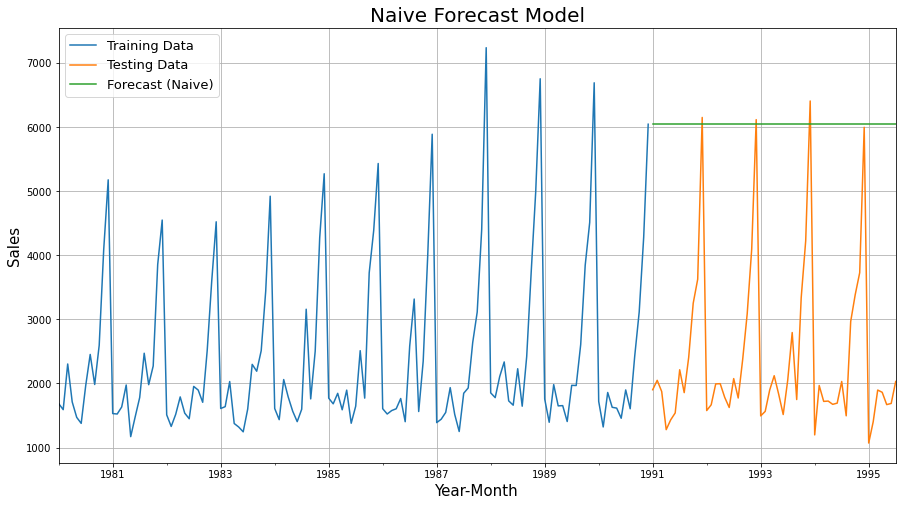

In [40]:
# new forecast variable
ts_data['fc_nm'] = value

# plotting the prediction results
rcParams['figure.figsize'] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_nm'].plot()
plt.title('Naive Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (Naive)'],
           fontsize=13, loc='upper left')
plt.show()

In [41]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_nm']

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 3864.28
MAPE: 201.33


### Simple Average Forecast Model

In [42]:
value = round(tr_data['sales'].mean())
print('Forecast Value: {}'.format(value))

Forecast Value: 2404


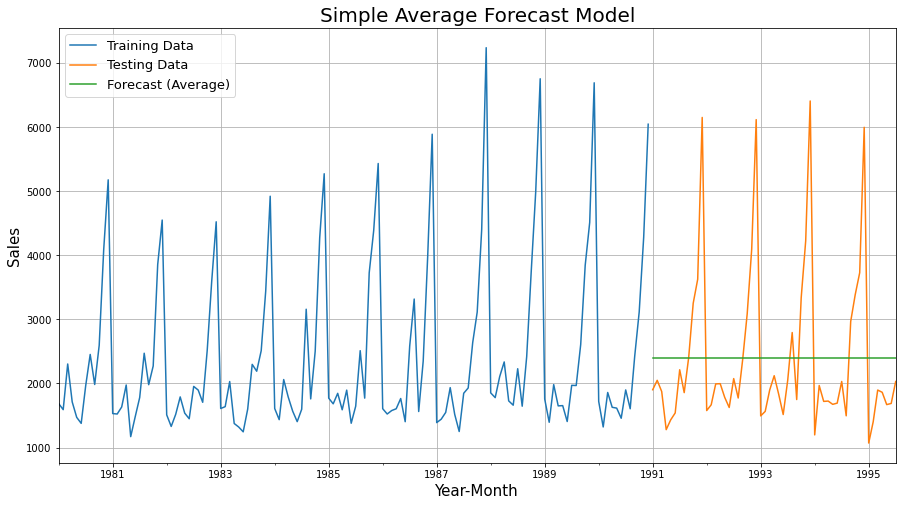

In [43]:
# new forecast variable
ts_data['fc_sam'] = value

# plotting the prediction results
rcParams['figure.figsize'] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_sam'].plot()
plt.title('Simple Average Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (Average)'],
           fontsize=13, loc='upper left')
plt.show()

In [44]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_sam']

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 1275.08
MAPE: 39.17


### Moving Average Forecast Model

In [45]:
df1 = df.copy()

In [46]:
# different window sizes

df1['trail_02'] = df1['sales'].rolling(2).mean()
df1['trail_04'] = df1['sales'].rolling(4).mean()
df1['trail_06'] = df1['sales'].rolling(6).mean()
df1['trail_08'] = df1['sales'].rolling(8).mean()

In [47]:
print(df1.head(10))

            sales  trail_02  trail_04     trail_06  trail_08
date                                                        
1980-01-31   1686       NaN       NaN          NaN       NaN
1980-02-29   1591    1638.5       NaN          NaN       NaN
1980-03-31   2304    1947.5       NaN          NaN       NaN
1980-04-30   1712    2008.0   1823.25          NaN       NaN
1980-05-31   1471    1591.5   1769.50          NaN       NaN
1980-06-30   1377    1424.0   1716.00  1690.166667       NaN
1980-07-31   1966    1671.5   1631.50  1736.833333       NaN
1980-08-31   2453    2209.5   1816.75  1880.500000  1820.000
1980-09-30   1984    2218.5   1945.00  1827.166667  1857.250
1980-10-31   2596    2290.0   2249.75  1974.500000  1982.875


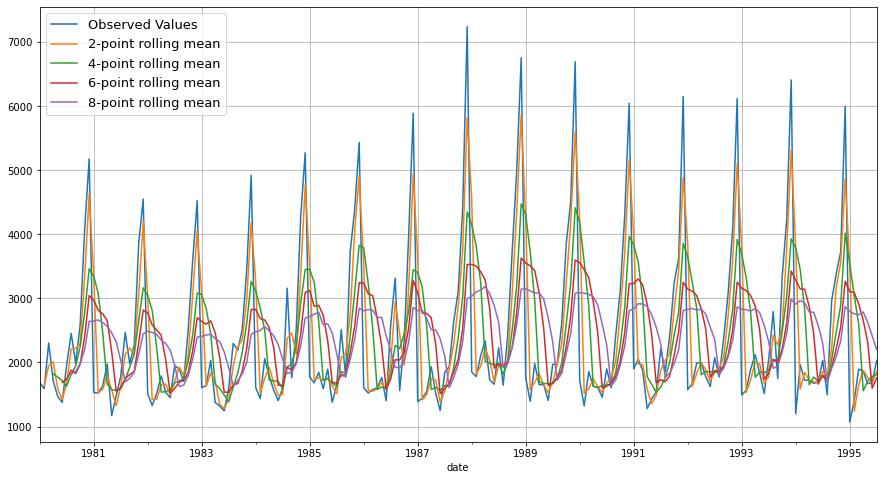

In [48]:
# plotting the original and window averaged values

rcParams[canvas] = (15,8)
df1['sales'].plot()
df1['trail_02'].plot()
df1['trail_04'].plot()
df1['trail_06'].plot()
df1['trail_08'].plot()
plt.grid()
plt.legend(['Observed Values','2-point rolling mean','4-point rolling mean','6-point rolling mean',
            '8-point rolling mean'], fontsize=13, loc='upper left')
plt.show()

In [49]:
# train and test splits

mv_tr_data = df1[df1.index.year<1991]
mv_ts_data = df1[df1.index.year>=1991]

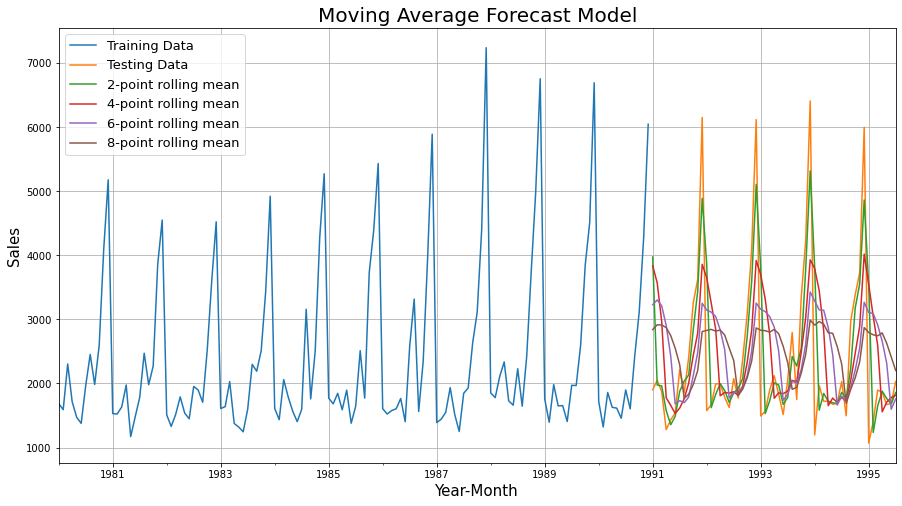

In [50]:
# plot of test data with its rolling mean values

rcParams[canvas] = (15,8)
mv_tr_data['sales'].plot()
mv_ts_data['sales'].plot()
mv_ts_data['trail_02'].plot()
mv_ts_data['trail_04'].plot()
mv_ts_data['trail_06'].plot()
mv_ts_data['trail_08'].plot()
plt.title('Moving Average Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','2-point rolling mean','4-point rolling mean',
            '6-point rolling mean','8-point rolling mean'], fontsize=13, loc='upper left')
plt.show()

In [51]:
# rmse and mape

col = ['2-point rolling mean','4-point rolling mean',
       '6-point rolling mean','8-point rolling mean']

for i in range(len(col)):
    y_true = mv_ts_data['sales']
    y_pred = mv_ts_data[mv_ts_data.columns[i+1]]

    rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
    mape_scr = round(mape(y_true, y_pred),2)
    
    print(col[i])
    print('')
    print('RMSE: {}'.format(rmse_scr))
    print('MAPE: {}'.format(mape_scr))
    print('\n')

2-point rolling mean

RMSE: 813.4
MAPE: 24.71


4-point rolling mean

RMSE: 1156.59
MAPE: 41.08


6-point rolling mean

RMSE: 1283.93
MAPE: 48.4


8-point rolling mean

RMSE: 1342.57
MAPE: 50.15




### Exponential Smoothing Forecast Model (Single)

In [52]:
# dropping instance variable

tr_data.drop('instance', axis=1, inplace=True)
ts_data.drop('instance', axis=1, inplace=True)

In [53]:
# single exponential smoothing model
model = SimpleExpSmoothing(tr_data, initialization_method='estimated').fit(optimized=True)

In [54]:
# model parameters
lst = list(model.params.values())

print('smoothing_level   : {}'.format(round(lst[0],4)))
print('smoothing_trend   : {}'.format(lst[1]))
print('smoothing_seasonal: {}'.format(lst[2]))
print('damping_trend     : {}'.format(lst[3]))
print('initial_level     : {}'.format(round(lst[4],2)))
print('initial_trend     : {}'.format(lst[5]))
print('initial_seasons   : {}'.format(lst[6]))
print('use_boxcox        : {}'.format(lst[7]))
print('lamda             : {}'.format(lst[8]))
print('remove_bias       : {}'.format(lst[9]))

smoothing_level   : 0.0703
smoothing_trend   : nan
smoothing_seasonal: nan
damping_trend     : nan
initial_level     : 1763.84
initial_trend     : nan
initial_seasons   : []
use_boxcox        : False
lamda             : None
remove_bias       : False


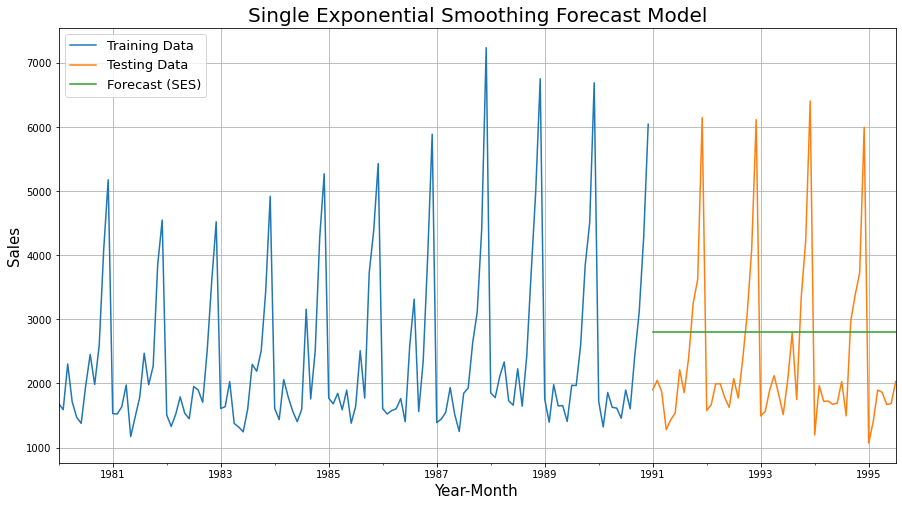

In [55]:
# forecasting upto ts_data length

value = model.forecast(steps=len(ts_data))
ts_data['fc_ses'] = value

# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_ses'].plot()
plt.title('Single Exponential Smoothing Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (SES)'],
           fontsize=13, loc='upper left')
plt.show()

In [56]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_ses']

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 1338.0
MAPE: 53.88


### Double Exponential Smoothing Forecast Model (Holt's Method)

In [57]:
# holt's model
model = Holt(tr_data, initialization_method='estimated',
             damped_trend=False).fit(optimized=True)

In [58]:
# model parameters
lst = list(model.params.values())

print('smoothing_level   : {}'.format(round(lst[0],4)))
print('smoothing_trend   : {}'.format(lst[1]))
print('smoothing_seasonal: {}'.format(lst[2]))
print('damping_trend     : {}'.format(lst[3]))
print('initial_level     : {}'.format(round(lst[4],2)))
print('initial_trend     : {}'.format(round(lst[5],2)))
print('initial_seasons   : {}'.format(lst[6]))
print('use_boxcox        : {}'.format(lst[7]))
print('lamda             : {}'.format(lst[8]))
print('remove_bias       : {}'.format(lst[9]))

smoothing_level   : 0.665
smoothing_trend   : 0.0001
smoothing_seasonal: nan
damping_trend     : nan
initial_level     : 1502.2
initial_trend     : 74.87
initial_seasons   : []
use_boxcox        : False
lamda             : None
remove_bias       : False


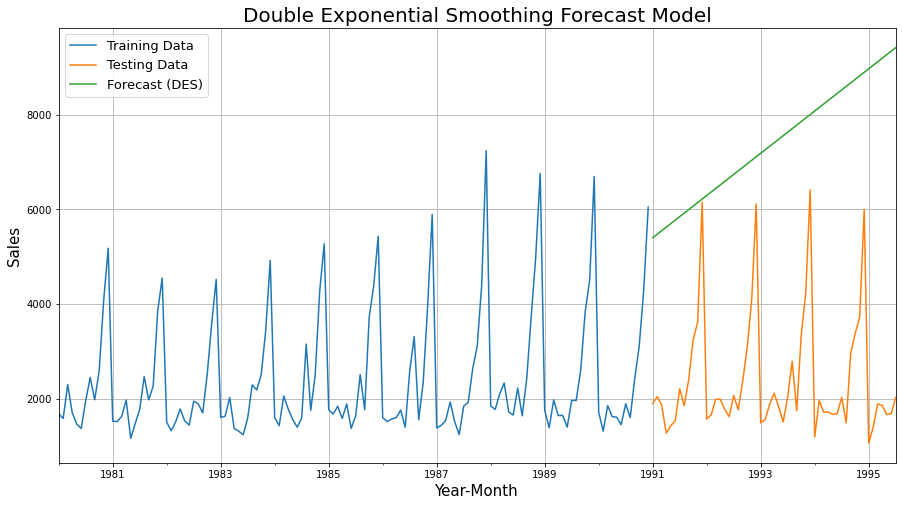

In [59]:
# forecasting upto ts_data length

value = model.forecast(steps=len(ts_data))
ts_data['fc_des'] = value

# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_des'].plot()
plt.title('Double Exponential Smoothing Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (DES)'],
           fontsize=13, loc='upper left')
plt.show()

In [60]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_des']

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 5291.88
MAPE: 269.18


### Triple Exponential Smoothing Forecast Model (Holt Winter's Method)

In [61]:
# holt winter's model
model = ExponentialSmoothing(tr_data, initialization_method='estimated',
                             trend=None, seasonal='multiplicative').fit(optimized=True)

In [62]:
# model parameters
lst = list(model.params.values())

print('smoothing_level   : {}'.format(round(lst[0],4)))
print('smoothing_trend   : {}'.format(lst[1]))
print('smoothing_seasonal: {}'.format(round(lst[2],4)))
print('damping_trend     : {}'.format(lst[3]))
print('initial_level     : {}'.format(round(lst[4],2)))
print('initial_trend     : {}'.format(round(lst[5],2)))
print('initial_seasons   : {}'.format(lst[6]))
print('use_boxcox        : {}'.format(lst[7]))
print('lamda             : {}'.format(lst[8]))
print('remove_bias       : {}'.format(lst[9]))

smoothing_level   : 0.1464
smoothing_trend   : nan
smoothing_seasonal: 0.3938
damping_trend     : nan
initial_level     : 2356.51
initial_trend     : nan
initial_seasons   : [0.71581804 0.68922223 0.90102343 0.80633    0.66434094 0.66754104
 0.87859521 1.11945197 0.91516397 1.17506038 1.80762133 2.27105238]
use_boxcox        : False
lamda             : None
remove_bias       : False


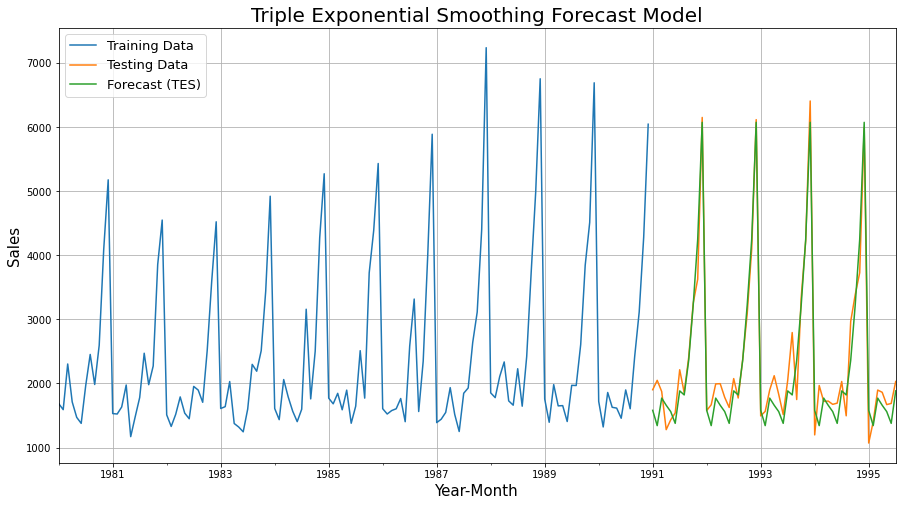

In [63]:
# forecasting upto ts_data length

value = model.forecast(steps=len(ts_data))
ts_data['fc_tes'] = value

# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['fc_tes'].plot()
plt.title('Triple Exponential Smoothing Forecast Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (TES)'],
           fontsize=13, loc='upper left')
plt.show()

In [64]:
# rmse and mape

y_true = ts_data['sales']
y_pred = ts_data['fc_tes']

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 317.07
MAPE: 12.14


### Stationarity of the Data

**Augmented Dickey Fuller Test**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [65]:
# static method for augmented dickey fuller test

def adf_results(tseries):
    
    # computations
    test_results = adfuller(tseries, autolag='AIC')
    dictn_values = list(test_results[4].values())

    # results
    print('t-statistics : {}'.format(round(test_results[0],4)))
    print('p-value      : {}'.format(round(test_results[1],4)))
    print('no.of.lags   : {}'.format(round(test_results[2])))
    print('observations : {}'.format(round(test_results[3])))
    print('1%  level    : {}'.format(round(dictn_values[0],4)))
    print('5%  level    : {}'.format(round(dictn_values[1],4)))
    print('10% level    : {}'.format(round(dictn_values[2],4)))
    print('')
    
    pvalue = test_results[1]
    
    print('-----------------------------------')
    
    if pvalue < 0.05:
        print('Time Series Data is Stationary')
    else:
        print('Time Series Data is Not-Stationary')
        
    print('-----------------------------------')

In [66]:
# adf test for full time series data (original)
adf_results(df)

t-statistics : -1.3605
p-value      : 0.6011
no.of.lags   : 11
observations : 175
1%  level    : -3.4683
5%  level    : -2.8782
10% level    : -2.5757

-----------------------------------
Time Series Data is Not-Stationary
-----------------------------------


In [67]:
# 1st differencing of the data
fd_df = df.diff().dropna()

In [68]:
# adf test for full time series data (1st difference)
adf_results(fd_df)

t-statistics : -45.0503
p-value      : 0.0
no.of.lags   : 10
observations : 175
1%  level    : -3.4683
5%  level    : -2.8782
10% level    : -2.5757

-----------------------------------
Time Series Data is Stationary
-----------------------------------


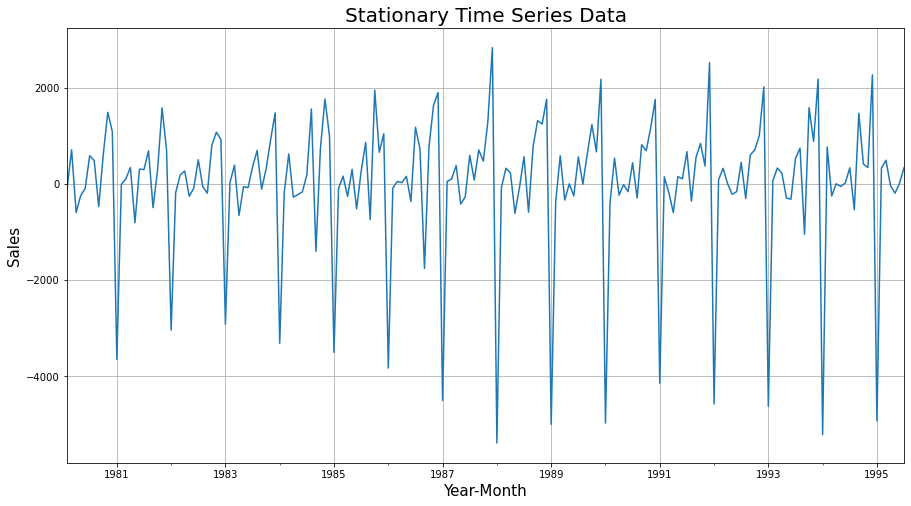

In [69]:
# stationary train data

rcParams[canvas] = (15,8)
fd_df['sales'].plot()
plt.title('Stationary Time Series Data', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()

### PACF and ACF Plots of Training Data

In [70]:
# adf test for train data (original)
adf_results(tr_data)

t-statistics : -1.2089
p-value      : 0.6697
no.of.lags   : 12
observations : 119
1%  level    : -3.4865
5%  level    : -2.8862
10% level    : -2.5799

-----------------------------------
Time Series Data is Not-Stationary
-----------------------------------


In [71]:
# 1st differencing of the train_data
fd_tr_data = tr_data.diff().dropna()

In [72]:
# adf test for train data (1st difference)
adf_results(fd_tr_data)

t-statistics : -8.005
p-value      : 0.0
no.of.lags   : 11
observations : 119
1%  level    : -3.4865
5%  level    : -2.8862
10% level    : -2.5799

-----------------------------------
Time Series Data is Stationary
-----------------------------------


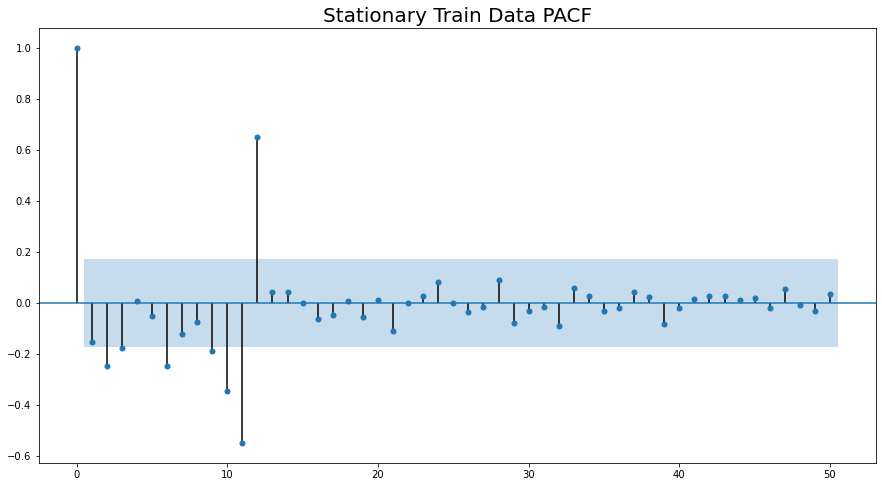

In [73]:
# pacf plot 
rcParams[canvas] = (15,8)
plot_pacf(fd_tr_data, lags=50, vlines_kwargs={'color':'black'}, method='ywmle')
plt.title('Stationary Train Data PACF', fontsize=20)
plt.show()

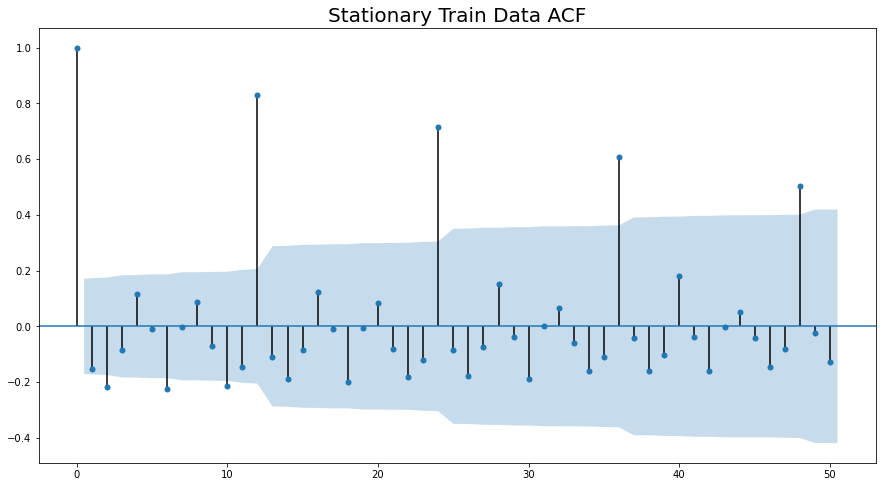

In [74]:
# acf plot of stationary train data
rcParams[canvas] = (15,8)
plot_acf(fd_tr_data, lags=50, vlines_kwargs={'color':'black'})
plt.title('Stationary Train Data ACF', fontsize=20)
plt.show()

###  Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [75]:
# different model parameters

p = range(0,3)
q = range(0,3)
d = range(1,2)

parameters = list(itools.product(p, d, q))

print('Different parameters for the model:', '\n')
for i in range(0,len(parameters)):
    print('Model: {}'.format(parameters[i]))

Different parameters for the model: 

Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [76]:
# seperate dataframe for models and aic scores

arima = pd.DataFrame(columns=['parameters','aic'])
arima

,parameters,aic


In [77]:
# constructing ARIMA models for different parameters and computing AIC scores

for pdq in parameters:
    model = ARIMA(tr_data['sales'].values, order=pdq).fit()
    score = round(model.aic,5)
    arima = arima.append({'parameters':pdq, 'aic':score},
                          ignore_index=True)

In [78]:
print(arima.sort_values('aic'))

  parameters         aic
8  (2, 1, 2)  2213.50921
7  (2, 1, 1)  2233.77763
2  (0, 1, 2)  2234.40832
5  (1, 1, 2)   2234.5272
4  (1, 1, 1)  2235.75509
6  (2, 1, 0)  2260.36574
1  (0, 1, 1)  2263.06002
3  (1, 1, 0)  2266.60854
0  (0, 1, 0)  2267.66304


In [79]:
# model with low aic score (using train data)

model = ARIMA(tr_data['sales'].values, order=(2,1,2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 16 Apr 2022   AIC                           2213.509
Time:                        19:04:31   BIC                           2227.885
Sample:                             0   HQIC                          2219.351
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [80]:
# making forecasts for ts_data time periods
value = results.forecast(steps=len(ts_data))
ts_data['arima_auto'] = value

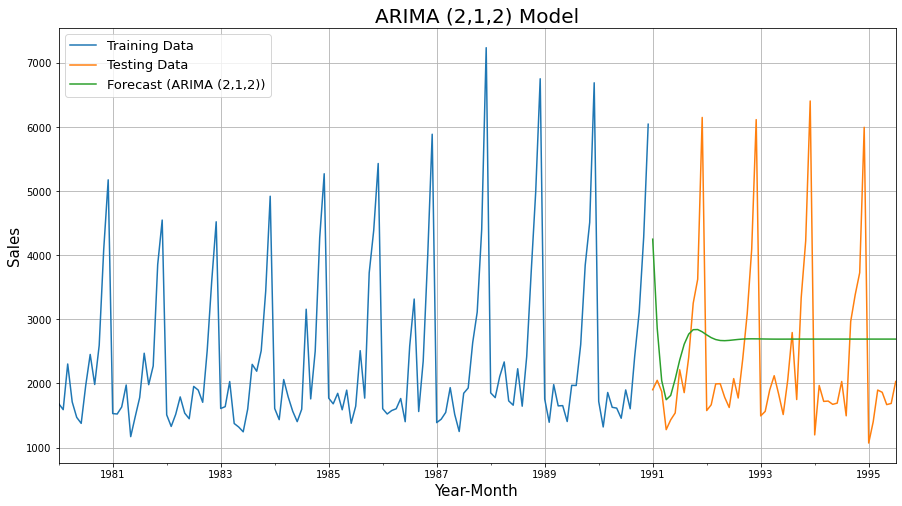

In [81]:
# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['arima_auto'].plot()
plt.title('ARIMA (2,1,2) Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (ARIMA (2,1,2))'],
           fontsize=13, loc='upper left')
plt.show()

In [82]:
# rmse and mape

y_true = ts_data['sales']
y_pred = value

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 1299.98
MAPE: 47.1


### ARIMA model using the actual cut-off points from Train Data ACF and PACF plots

In [83]:
# model using actual cut-off points

model = ARIMA(tr_data['sales'], order=(0,1,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 16 Apr 2022   AIC                           2267.663
Time:                        19:04:31   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

In [84]:
# making forecasts for ts_data time periods
value = results.forecast(steps=len(ts_data))
ts_data['arima_cut'] = value

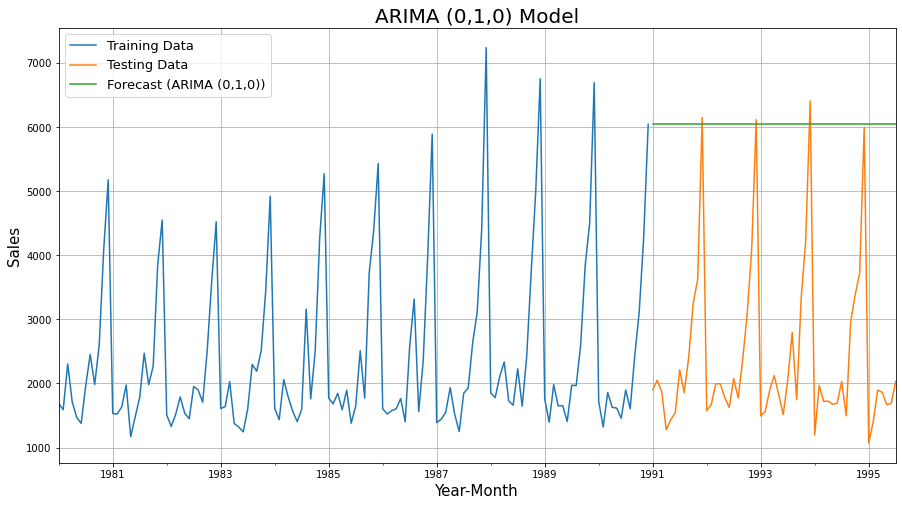

In [85]:
# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['arima_cut'].plot()
plt.title('ARIMA (0,1,0) Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (ARIMA (0,1,0))'],
           fontsize=13, loc='upper left')
plt.show()

In [86]:
# rmse and mape for the desired model

y_true = ts_data['sales']
y_pred = value

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 3864.28
MAPE: 201.33


### Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Here, we have taken alpha=0.05.

- We are going to take the seasonal period as 12.

- We are taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off at ___ 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off at ___

In [87]:
# possible parameters (taking seasonal factor m=12)

p = range(0,3)
q = range(0,3)
d = range(1,2)
D = range(0,1) 
m = 12

parameters = list(itools.product(p, d, q))
snl_params = [(x[0], x[1], x[2], m) for x in list(itools.product(p, D, q))]

print('Parameter combinations for the Model')
print('')
for i in range(0,len(parameters)):
    print('Model Parameters: {} {}'.format(parameters[i],snl_params[i]))

Parameter combinations for the Model

Model Parameters: (0, 1, 0) (0, 0, 0, 12)
Model Parameters: (0, 1, 1) (0, 0, 1, 12)
Model Parameters: (0, 1, 2) (0, 0, 2, 12)
Model Parameters: (1, 1, 0) (1, 0, 0, 12)
Model Parameters: (1, 1, 1) (1, 0, 1, 12)
Model Parameters: (1, 1, 2) (1, 0, 2, 12)
Model Parameters: (2, 1, 0) (2, 0, 0, 12)
Model Parameters: (2, 1, 1) (2, 0, 1, 12)
Model Parameters: (2, 1, 2) (2, 0, 2, 12)


In [88]:
# creating a seperate dataframe for the aic scores

sarima = pd.DataFrame(columns=['parameters','seasonal','aic'])
sarima

,parameters,seasonal,aic


In [89]:
for pdq in parameters:
    for PDQ in snl_params:
        model = sm_api.tsa.statespace.SARIMAX(tr_data['sales'].values, seasonal_order=PDQ, order=pdq,
                                                enforce_invertibility=False, enforce_stationarity=False)
            
        results = model.fit(maxiter=1000)
        print("AIC for parameters {}x{}: {}".format(pdq, PDQ, results.aic))
        sarima = sarima.append({'parameters':pdq, 'seasonal':PDQ,'aic':results.aic},
                                       ignore_index=True)

AIC for parameters (0, 1, 0)x(0, 0, 0, 12): 2251.3597196862966
AIC for parameters (0, 1, 0)x(0, 0, 1, 12): 1956.261461684592
AIC for parameters (0, 1, 0)x(0, 0, 2, 12): 1723.1533640234275
AIC for parameters (0, 1, 0)x(1, 0, 0, 12): 1837.436602245668
AIC for parameters (0, 1, 0)x(1, 0, 1, 12): 1806.9905301389272
AIC for parameters (0, 1, 0)x(1, 0, 2, 12): 1633.2108735791694
AIC for parameters (0, 1, 0)x(2, 0, 0, 12): 1648.3776153470858
AIC for parameters (0, 1, 0)x(2, 0, 1, 12): 1647.205415860455
AIC for parameters (0, 1, 0)x(2, 0, 2, 12): 1630.98980539208
AIC for parameters (0, 1, 1)x(0, 0, 0, 12): 2230.162907850582
AIC for parameters (0, 1, 1)x(0, 0, 1, 12): 1923.7688649566421
AIC for parameters (0, 1, 1)x(0, 0, 2, 12): 1692.7089572968055
AIC for parameters (0, 1, 1)x(1, 0, 0, 12): 1797.1795881838273
AIC for parameters (0, 1, 1)x(1, 0, 1, 12): 1738.0903193763033
AIC for parameters (0, 1, 1)x(1, 0, 2, 12): 1570.1509144283382
AIC for parameters (0, 1, 1)x(2, 0, 0, 12): 1605.675195417871

In [90]:
print(sarima.sort_values('aic').head())

   parameters       seasonal          aic
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076771
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402


In [91]:
# model with best parameters
model = sm_api.tsa.statespace.SARIMAX(tr_data['sales'], seasonal_order=(1,0,2,12), order=(1,1,2),
                                      enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 16 Apr 2022   AIC                           1555.585
Time:                                    19:06:13   BIC                           1574.095
Sample:                                01-31-1980   HQIC                          1563.084
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.253     -2.481      0.013      -1.124      -0.132
ma.L1         -0.1031      0.223   

In [92]:
# making forecasts for ts_data time periods
value = results.forecast(steps=len(ts_data))
ts_data['sarima_auto'] = value

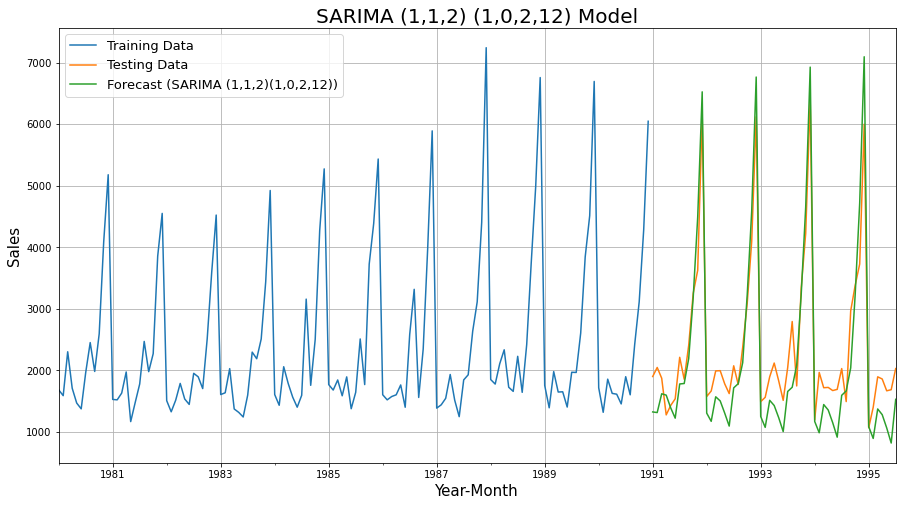

In [93]:
# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['sarima_auto'].plot()
plt.title('SARIMA (1,1,2) (1,0,2,12) Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (SARIMA (1,1,2)(1,0,2,12))'],
           fontsize=13, loc='upper left')
plt.show()

In [94]:
# rmse and mape

y_true = ts_data['sales']
y_pred = value

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 527.77
MAPE: 20.92


### SARIMA Model with actual cutoff values

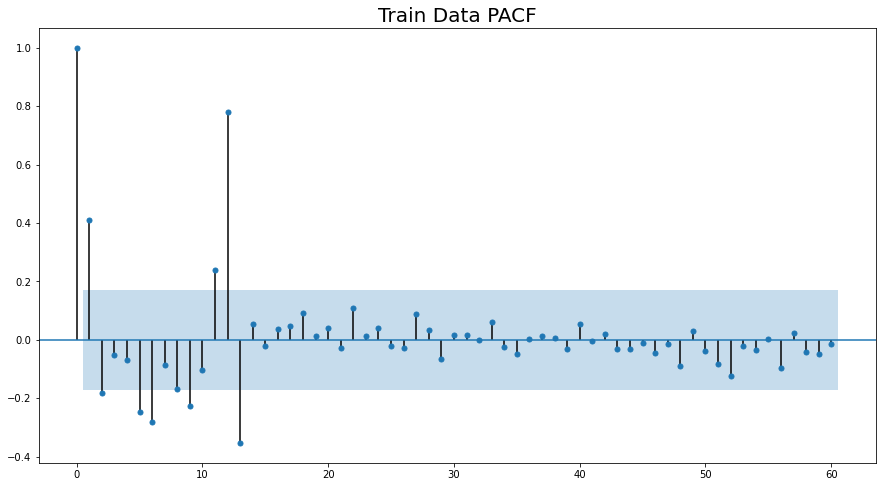

In [95]:
# pacf plot 
rcParams[canvas] = (15,8)
plot_pacf(tr_data, lags=60, vlines_kwargs={'color':'black'}, method='ywmle')
plt.title('Train Data PACF', fontsize=20)
plt.show()

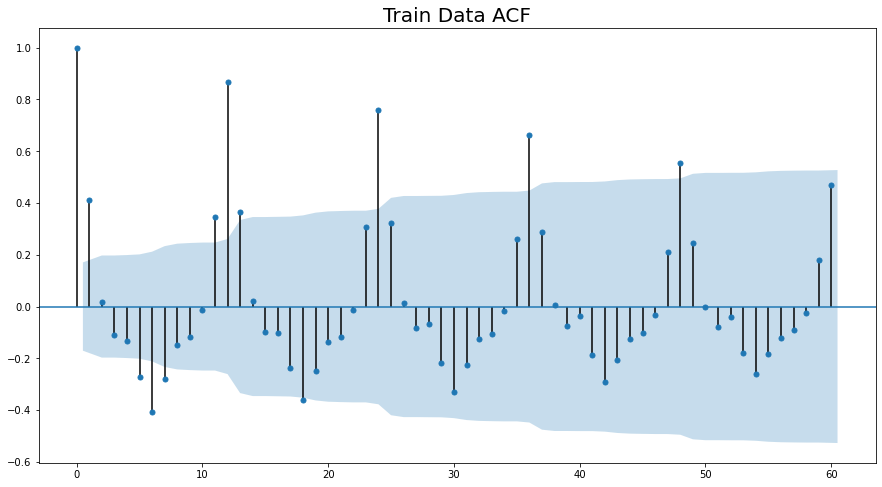

In [96]:
# pacf plot 
rcParams[canvas] = (15,8)
plot_acf(tr_data, lags=60, vlines_kwargs={'color':'black'})
plt.title('Train Data ACF', fontsize=20)
plt.show()

# plt.savefig('36. TD-ACF.jpg', dpi=300)

Here, we have taken alpha=0.05.

- We are going to take the seasonal period as 12.

- We are taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model.

- The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off at ___ 
- The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off at ___

In [97]:
# model with best parameters
model = sm_api.tsa.statespace.SARIMAX(tr_data['sales'], seasonal_order=(1,0,4,12), order=(0,1,0),
                                      enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                         sales   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -632.314
Date:                                       Sat, 16 Apr 2022   AIC                           1276.628
Time:                                               19:06:17   BIC                           1291.068
Sample:                                           01-31-1980   HQIC                          1282.426
                                                - 12-31-1990                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0333     

In [98]:
# making forecasts for ts_data time periods
value = results.forecast(steps=len(ts_data))
ts_data['sarima_cut'] = value

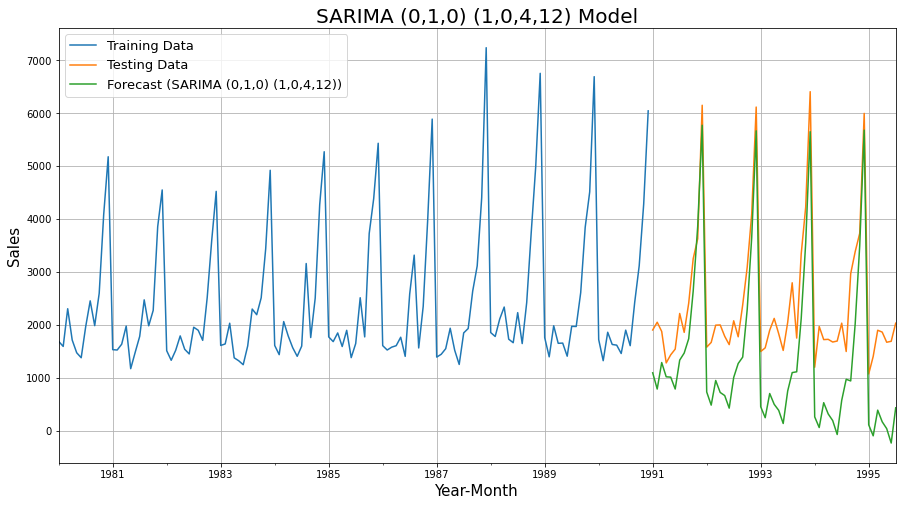

In [99]:
# plotting the prediction results
rcParams[canvas] = (15,8)
tr_data['sales'].plot()
ts_data['sales'].plot()
ts_data['sarima_cut'].plot()
plt.title('SARIMA (0,1,0) (1,0,4,12) Model', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(['Training Data','Testing Data','Forecast (SARIMA (0,1,0) (1,0,4,12))'],
           fontsize=13, loc='upper left')
plt.show()

In [100]:
# rmse and mape

y_true = ts_data['sales']
y_pred = value

rmse_scr = round(rmse(y_true, y_pred, squared=False),2)
mape_scr = round(mape(y_true, y_pred),2)

print('RMSE: {}'.format(rmse_scr))
print('MAPE: {}'.format(mape_scr))

RMSE: 1159.02
MAPE: 54.44


### Model Comparison

In [101]:
# model performance data frame
data = {'rmse':[1389.14,3864.28,1275.08,813.40,1156.59,1283.93,1342.57,
                1338.10,5291.88,317.07,1299.98,3864.28,527.77,1159.02],
        'mape':[59.35,201.33,39.17,24.71,41.08,48.40,50.15,
                53.88,269.18,12.14,47.10,201.33,20.92,54.44]}
indx = ['Linear Regression','Naive Forecast','Average Forecast','2p Moving Average',
        '4p Moving Average','6p Moving Average','8p Moving Average','Single Exp Smoothing',
        'Double Exp Smoothing', 'Triple Exp Smoothing','ARIMA (2,1,2)','ARIMA (0,1,0)',
        'SARIMA (1,1,2)(1,0,2,12)','SARIMA (0,1,0)(1,0,4,12)']

performance = pd.DataFrame(data, index=indx)
print(performance.sort_values('rmse'))

                             rmse    mape
Triple Exp Smoothing       317.07   12.14
SARIMA (1,1,2)(1,0,2,12)   527.77   20.92
2p Moving Average          813.40   24.71
4p Moving Average         1156.59   41.08
SARIMA (0,1,0)(1,0,4,12)  1159.02   54.44
Average Forecast          1275.08   39.17
6p Moving Average         1283.93   48.40
ARIMA (2,1,2)             1299.98   47.10
Single Exp Smoothing      1338.10   53.88
8p Moving Average         1342.57   50.15
Linear Regression         1389.14   59.35
Naive Forecast            3864.28  201.33
ARIMA (0,1,0)             3864.28  201.33
Double Exp Smoothing      5291.88  269.18


Observations:

- From the performance table we can see that the triple exponential smoothing model or holt winter's model give the least rmse and mape values for our time series data.
- Hence Holt Winter's Forecast model is our optimal model and we use it to forecast the next 12 months of sparkling wine sales.

---------

### Final Model

In [102]:
# holt winter's model
fmodel = ExponentialSmoothing(df, trend=None, seasonal='multiplicative',
                              initialization_method='estimated').fit(optimized=True)

In [103]:
# model parameters
lst = list(fmodel.params.values())

print('smoothing_level   : {}'.format(round(lst[0],4)))
print('smoothing_trend   : {}'.format(lst[1]))
print('smoothing_seasonal: {}'.format(round(lst[2],4)))
print('damping_trend     : {}'.format(lst[3]))
print('initial_level     : {}'.format(round(lst[4],2)))
print('initial_trend     : {}'.format(round(lst[5],2)))
print('initial_seasons   : {}'.format(lst[6]))
print('use_boxcox        : {}'.format(lst[7]))
print('lamda             : {}'.format(lst[8]))
print('remove_bias       : {}'.format(lst[9]))

smoothing_level   : 0.0978
smoothing_trend   : nan
smoothing_seasonal: 0.3007
damping_trend     : nan
initial_level     : 2346.15
initial_trend     : nan
initial_seasons   : [0.69611079 0.66658276 0.84520535 0.77885096 0.64647392 0.63949266
 0.8447511  1.07433192 0.88503224 1.16412409 1.7564541  2.23951042]
use_boxcox        : False
lamda             : None
remove_bias       : False


In [104]:
# next 12 months sales forecasting
forecast = fmodel.forecast(steps=12)

In [105]:
# calculated error term 
error = 1.96 * (np.std(fmodel.resid,ddof=1))
print('Error: {}'.format(round(error,2)))

Error: 686.65


In [106]:
# forecast with ci dataframe
data = {'ci_lower': (forecast - error),
        'forecast': forecast,
        'ci_upper': (forecast + error)}
ci_range = pd.DataFrame(data)
print(ci_range)

               ci_lower     forecast     ci_upper
1995-08-31  1236.962437  1923.608483  2610.254529
1995-09-30  1701.902193  2388.548239  3075.194285
1995-10-31  2523.693202  3210.339248  3896.985294
1995-11-30  3246.446275  3933.092321  4619.738367
1995-12-31  5364.597604  6051.243650  6737.889696
1996-01-31   663.777794  1350.423840  2037.069886
1996-02-29   937.620761  1624.266807  2310.912853
1996-03-31  1172.999633  1859.645679  2546.291725
1996-04-30  1137.722877  1824.368923  2511.014969
1996-05-31   984.376870  1671.022916  2357.668962
1996-06-30   904.127959  1590.774005  2277.420051
1996-07-31  1312.085451  1998.731497  2685.377543


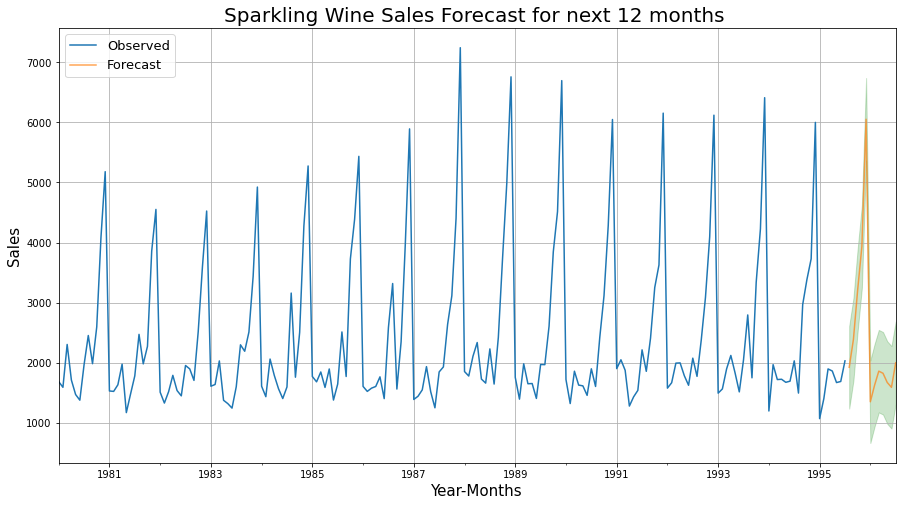

In [107]:
# 12 months forecast

axis = df['sales'].plot(label='Observed')
forecast.plot(ax=axis, alpha=0.7, label='Forecast')
axis.fill_between(ci_range.index, ci_range['ci_lower'],ci_range['ci_upper'],
                  alpha=0.20, color='green')
axis.set_title('Sparkling Wine Sales Forecast for next 12 months ', fontsize=20)
axis.set_xlabel('Year-Months', fontsize=15)
axis.set_ylabel('Sales', fontsize=15)
plt.grid()
plt.legend(loc='upper left', fontsize=13)
plt.show()